In [ ]:
#!pip install tensorflow
#!pip install tensorflow
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
%cd /mydrive/yolov4_traffic_sign_detection

/content/gdrive/My Drive/yolov4_traffic_sign_detection


In [ ]:
### If you want to visualize the images of Dataset

00230.txt: 
0 0.7264705882352941 0.515 0.020588235294117647 0.035
1 0.7261029411764706 0.555625 0.028676470588235293 0.04625

00248.txt: 
0 0.15919117647058822 0.581875 0.01838235294117647 0.03375
0 0.6297794117647059 0.553125 0.019852941176470587 0.03375

00307.txt: 
3 0.3474264705882353 0.611875 0.022794117647058822 0.03875
3 0.5963235294117647 0.588125 0.023529411764705882 0.04125
1 0.6713235294117647 0.54625 0.030882352941176472 0.05
2 0.6216911764705882 0.586875 0.02426470588235294 0.04125

00255.txt: 
2 0.16286764705882353 0.6775 0.05661764705882353 0.0975



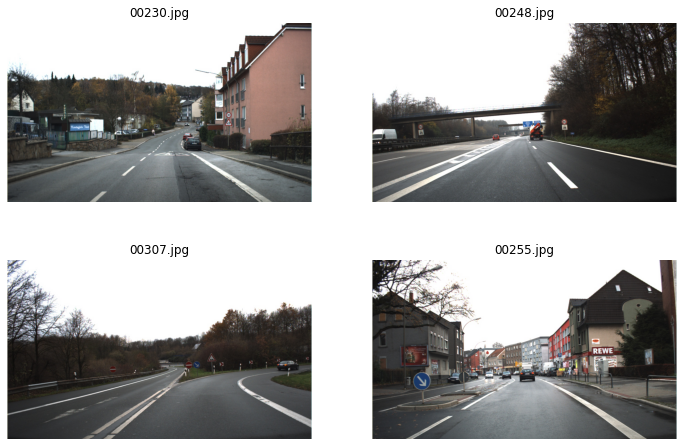

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("darknet/data/data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
# Downloaded the dataset from internet to execute this example 

# download custom data of common traffic signs

!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4" -O ts.zip
!unzip ts.zip
!rm -f ts.zip
#!ls
#%cd ..

# You can use below lines if you are working on jupyter with windows . The task of below lines is similar - download data, unzip data
import wget
url = "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4"
myfile = wget.download(url)
# Unzip the downloaded folder and saved the unziped files in dataset folder
import zipfile
unzip = zipfile.ZipFile('ts.zip')
unzip.extractall('data')

#unzip.close()



In [ ]:
# download darknet folder - for windows use darknet of AlexeyAB and for linux download darknet of pjreddie
# uncomment the below line to download darknet folder. I already have so commented it

!git clone https://github.com/AlexeyAB/darknet

# Changes to do in yolov4 architecture as per your dataset
### Open darknet folder -> cfg folder -> yolov4-custom.cfg

#### Note: Delete everything from this "cfg" folder but don't delete yolov4-custom.cfg.
This step is optional. We are just deleting all these files to simply the process. Those files are extra, not required for executing yolov4



### Open  yolov4-custom.cfg file and do the changes as per your dataset Training
#### change batch=1 from batch=64
#### change subdivisions=1 from subdivisions=16
#### width=608  #416
#### height=608 #416

#### Next is max_batches.This parameter is very very important.The thing to remember here is that minimum batch value would be 6000 ( if you have 1 class or 2 classes or 3 classes.)
#### In our case we have 4 classes. So max_batches would be 4*2000 = 8000 i.e 8000 would be the max_batches.

#### Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch
#### steps are steps=7200,6400  (90% of 8000 and 80% of 8000)

### We have 3 YOLO layers for 3 different scales.
#### Showing you a demo below.  Just see the [Yolo] layer. Above [YOLO] layer, we have [convolutional] layer. Change the number of 
#### filters as per your output classes as per this calculation (classes+5)*3 = (4+5)*3 = 27

"""
# [convolutional]
size=1
stride=1
pad=1
filters=255  # change this to 27
activation=linear


# [yolo]


## In the same way search for other 2 [Yolo] layers and then the [Convolutional] layer which is above the [yolo] layer. Just change the number of filters
# Also change the number of classes as per your dataset.


# Next Change is open Darknet folder -> data folder
#### Delete everything from this folder except labels folder. Don't delete Labels Folder


#### Under this data folder paste your dataset folder (images with their text files)
# Now create 2 files data.obj and data.names in the darknet -> data .
### data.obj have details like how many classes you have, path of your training and test file. Also mentioned the path where we want to store the trained model weights.



In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4_traffic_sign_detection/darknet


In [ ]:
!make

In [ ]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights which have been trained up to 137 convolutional layers.
# Run the following command to download the YOLOv4 pre-trained weights file.

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
!ls data/

data	   data.names	  demo.mp4  results1.avi  test_old.txt	train_old.txt
data.data  data_old.data  labels    test.jpg	  test.txt	train.txt


In [ ]:
pwd

'/content/gdrive/My Drive/yolov4_traffic_sign_detection/darknet'

In [ ]:
!chmod +x ./darknet

In [ ]:
!./darknet detector train data/data.data cfg/yolov4-custom.cfg yolov4.conv.137  -dont_show 


In [1]:

#Note: If you changed width= or height= in your cfg-file, then new width and height must be divisible by 32.
#darknet.exe detector test data/obj.data yolo-obj.cfg yolo-obj_8000.weights
#it is not necessary to train the network again, just use .weights-file already trained for 416x416 resolution but to get even greater accuracy you should train with higher resolution 608x608 or 832x832, 
#note: if error Out of memory occurs then in .cfg-file you should increase subdivisions=16, 32 or 64

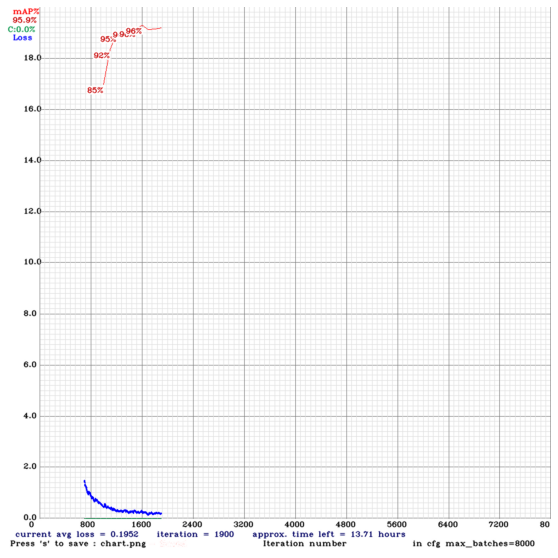

In [ ]:
#can check the performance of all the trained weights by looking at the chart.png file. However, the chart.png file only shows results if the training does not get interrupted i.e. if you do not get disconnected or lose your session. If you restart training from a saved point, this will not work.
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [ ]:
img_path = "data/test.jpg"
!./darknet detector test data/data.data cfg/test-yolov4-custom.cfg backup/yolov4-custom_1000.weights {img_path} -dont-show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

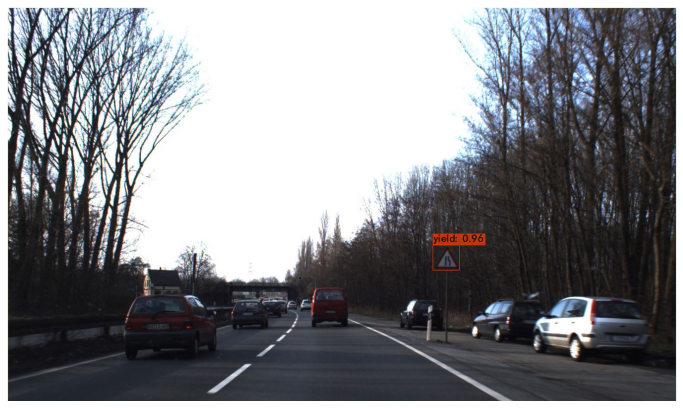

In [ ]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
video_path = "data/demo.mp4"

!./darknet detector demo data/data.data cfg/yolov4-custom.cfg backup/yolov4-custom_1000.weights -dont_show data/demo.mp4 -i 0 -out_filename data/results1.avi

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 